In [1]:
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
import os, json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from corner import corner
from acor import acor
from utils.UL_uncert import UL_uncert

from astropy.time import Time
from matplotlib.colors import LogNorm

%matplotlib inline

def trace_plot(chain, pars,
               cols=3, wid_per_col=4, aspect=4/3,
               kwargs={}):

    rows = len(pars)//cols
    if rows*cols < len(pars):
        rows += 1

    ax = []
    width = wid_per_col * cols
    height = wid_per_col * rows / aspect
    fig = plt.figure(figsize=(width, height))

    for pp, par in enumerate(pars):
        ax.append(fig.add_subplot(rows, cols, pp+1))
        ax[pp].plot(chain[:,pp], **kwargs)
        ax[pp].set_xlabel(par)
    plt.tight_layout()
    return fig


def hist_plot(chain, pars, bins=30,
              cols=3, wid_per_col=4, aspect=4/3,
              kwargs={}):
    hist_kwargs = {
        'density':True,
        'histtype':'step',
    }
    for key, val in kwargs.items():
        hist_kwargs[key] = val

    rows = len(pars)//cols
    if rows*cols < len(pars):
        rows += 1

    ax = []
    width = wid_per_col * cols
    height = wid_per_col * rows / aspect
    fig = plt.figure(figsize=(width, height))

    for pp, par in enumerate(pars):
        ax.append(fig.add_subplot(rows, cols, pp+1))
        ax[pp].hist(chain[:,pp], bins=bins, **hist_kwargs)
        ax[pp].set_xlabel(par)
    plt.tight_layout()
    return fig

In [11]:
plt.rcParams.update(plt.rcParamsDefault)
params = {'backend': 'pdf',
        'axes.labelsize': 12,
        'lines.markersize': 4,
        'font.size': 12,
        'xtick.major.size':6,
        'xtick.minor.size':3,
        'ytick.major.size':6,
        'ytick.minor.size':3,
        'xtick.major.width':0.7,
        'ytick.major.width':0.7,
        'xtick.minor.width':0.7,
        'ytick.minor.width':0.7,
        'lines.markeredgewidth':1.2,
        'axes.linewidth':1.375,
        'legend.fontsize': 12,
        'xtick.labelsize': 12,
        'ytick.labelsize': 12,
        'savefig.dpi':200,
        'path.simplify':True,
        #'font.family': 'serif',
        #'font.serif':'Times',
        'text.latex.preamble':'\\usepackage{amsmath}',
        'text.usetex':True,
         }

plt.rcParams.update(params)

# load data

In [2]:
col_11yr = np.loadtxt('ULvT/11yr_cols.dat', dtype=str)
UL_11yr = np.loadtxt('ULvT/11yr_UL.dat')
dUL_11yr = np.loadtxt('ULvT/11yr_dUL.dat')
Ts_11yr = np.loadtxt('ULvT/11yr_Ts.dat')

col_9yr = np.loadtxt('ULvT/9yr_cols.dat', dtype=str)
UL_9yr = np.loadtxt('ULvT/9yr_UL.dat')
dUL_9yr = np.loadtxt('ULvT/9yr_dUL.dat')
Ts_9yr = np.loadtxt('ULvT/9yr_Ts.dat')

# rerun
col_rerun = np.loadtxt('ULvT_rerun/11yr_cols.dat', dtype=str)
UL_rerun = np.loadtxt('ULvT_rerun/11yr_UL.dat')
dUL_rerun = np.loadtxt('ULvT_rerun/11yr_dUL.dat')
Ts_rerun = np.loadtxt('ULvT_rerun/11yr_Ts.dat')

# resamp for uniform sky & pol post
col_resamp = np.loadtxt('ULvT_resamp/11yr_cols.dat', dtype=str)
UL_resamp = np.loadtxt('ULvT_resamp/11yr_UL.dat')
dUL_resamp = np.loadtxt('ULvT_resamp/11yr_dUL.dat')
Ts_resamp = np.loadtxt('ULvT_resamp/11yr_Ts.dat')

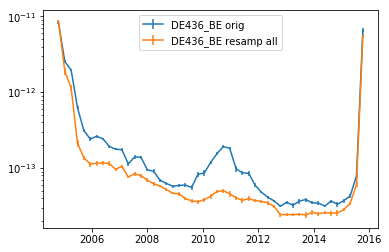

In [3]:
#plt.errorbar(Ts_11yr, UL_11yr[idx], yerr=dUL_11yr[idx], label=col_11yr[idx])
idx = list(col_rerun).index('DE436_BE')
plt.errorbar(Ts_rerun, UL_rerun[idx], yerr=dUL_rerun[idx], label=col_rerun[idx]+' orig')

idx = list(col_resamp).index('DE436_BE')
plt.errorbar(Ts_resamp, UL_resamp[idx], yerr=dUL_resamp[idx], label=col_resamp[idx]+' resamp all')


plt.yscale('log')
plt.legend()

Text(0, 0.5, '$95\\%$ UL (strain)')

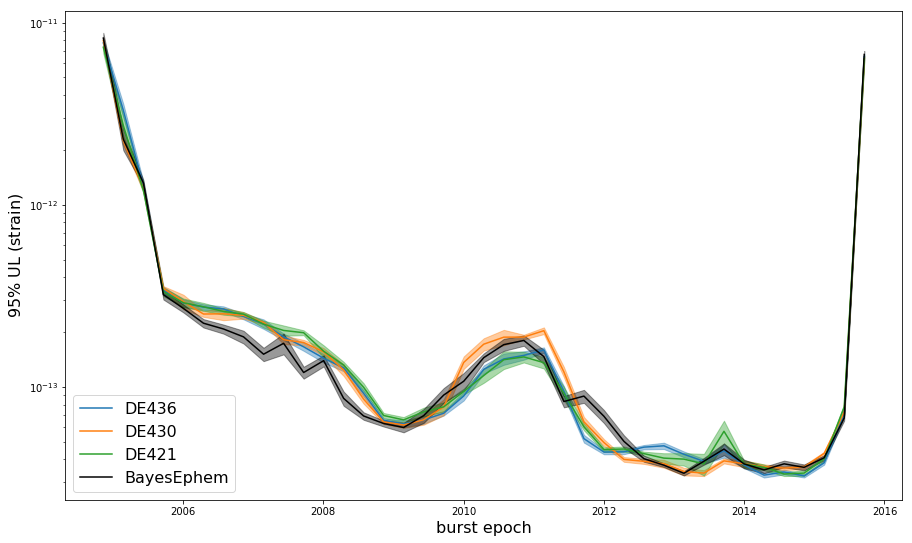

In [4]:
ii = list(col_11yr).index('DE421')
high_421 = UL_11yr[ii] + dUL_11yr[ii]
low_421 = UL_11yr[ii] - dUL_11yr[ii]
ULs_421 = UL_11yr[ii]

ii = list(col_11yr).index('DE430')
high_430 = UL_11yr[ii] + dUL_11yr[ii]
low_430 = UL_11yr[ii] - dUL_11yr[ii]
ULs_430 = UL_11yr[ii]

ii = list(col_11yr).index('DE436')
high_436 = UL_11yr[ii] + dUL_11yr[ii]
low_436 = UL_11yr[ii] - dUL_11yr[ii]
ULs_436 = UL_11yr[ii]

ii = list(col_11yr).index('DE436_BE')
high_BE = UL_11yr[ii] + dUL_11yr[ii]
low_BE = UL_11yr[ii] - dUL_11yr[ii]
ULs_BE = UL_11yr[ii]

Ts = Ts_11yr

plt.close('all')

fig = plt.figure(figsize=(15,9))
ax = fig.add_subplot(111)

ax.fill_between(Ts, low_436, high_436, color='C0', alpha=0.4)
ax.plot(Ts, ULs_436, color='C0', label='DE436')

ax.fill_between(Ts, low_430, high_430, color='C1', alpha=0.4)
ax.plot(Ts, ULs_430, color='C1', label='DE430')

ax.fill_between(Ts, low_421, high_421, color='C2', alpha=0.4)
ax.plot(Ts, ULs_421, color='C2', label='DE421')

ax.fill_between(Ts, low_BE, high_BE, color='k', alpha=0.4)
ax.plot(Ts, ULs_BE, color='k', label='BayesEphem')


ax.legend(loc='lower left', fontsize=16)
ax.set_yscale('log')
ax.set_xlabel(r'burst epoch', fontsize=16)
ax.set_ylabel(r'$95\%$ UL (strain)', fontsize=16)

NameError: name 'k' is not defined

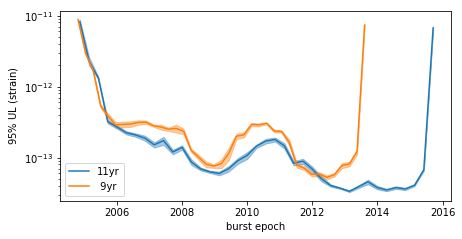

In [5]:
ii = list(col_11yr).index('DE436_BE')
high_11 = UL_11yr[ii] + dUL_11yr[ii]
low_11 = UL_11yr[ii] - dUL_11yr[ii]
ULs_11 = UL_11yr[ii]

ii = list(col_9yr).index('DE436_BE')
high_9 = UL_9yr[ii] + dUL_9yr[ii]
low_9 = UL_9yr[ii] - dUL_9yr[ii]
ULs_9 = UL_9yr[ii]

T11 = Ts_11yr
T9 = Ts_9yr

plt.close('all')

fig = plt.figure(figsize=(7,3.5))
ax = fig.add_subplot(111)

ax.fill_between(T11, low_11, high_11, color='C0', alpha=0.4)
ax.plot(T11, ULs_11, color='C0', label='11yr')

ax.fill_between(T9, low_9, high_9, color='C1', alpha=0.4)
ax.plot(T9, ULs_9, color='C1', label=' 9yr')

ax.legend(loc='lower left')#, fontsize=16)
ax.set_yscale('log')
ax.set_xlabel(r'burst epoch')#, fontsize=16)
ax.set_ylabel(r'$95\%$ UL (strain)')#, fontsize=16)
k
fig.tight_layout()
fig.savefig("/home/pbaker/ULvT.pdf")

In [ ]:
plt.close('all')

fig = plt.figure(figsize=(15,12))
ax1, ax2 = fig.subplots(2, 1, sharex=True)

ax1.fill_between(T11, low_11, high_11, color='k', alpha=0.4)
ax1.plot(T11, ULs_11, color='k', label='11yr')

ax1.fill_between(T9, low_9, high_9, color='C2', alpha=0.4)
ax1.plot(T9, ULs_9, color='C2', label=' 9yr')

ax1.legend(loc='lower left', fontsize=16)
ax1.set_yscale('log')
ax1.set_ylabel(r'$95\%$ UL (strain)', fontsize=16)

ax2.fill_between(Ts, low_436, high_436, color='C0', alpha=0.4)
ax2.plot(Ts, ULs_436, color='C0', label='DE436')

ax2.fill_between(Ts, low_430, high_430, color='C1', alpha=0.4)
ax2.plot(Ts, ULs_430, color='C1', label='DE430')

ax2.fill_between(Ts, low_BE, high_BE, color='k', alpha=0.4)
ax2.plot(Ts, ULs_BE, color='k', label='BayesEphem')

ax2.legend(loc='lower left', fontsize=16)
ax2.set_yscale('log')
ax2.set_xlabel(r'burst epoch', fontsize=16)
ax2.set_ylabel(r'$95\%$ UL (strain)', fontsize=16)
plt.tight_layout()

In [ ]:
for UL, dUL, col in zip(UL_9yr, dUL_9yr, col_9yr):
    plt.errorbar(Ts_9yr, UL, yerr=dUL, label=col)
plt.yscale('log')
plt.legend()

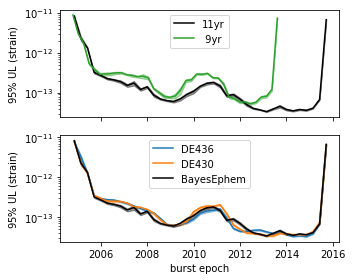

In [6]:
plt.close('all')

fig = plt.figure(figsize=(5,4))
ax1, ax2 = fig.subplots(2, 1, sharex=True)

ax1.fill_between(T11, low_11, high_11, color='k', alpha=0.4)
ax1.plot(T11, ULs_11, color='k', label='11yr')

ax1.fill_between(T9, low_9, high_9, color='C2', alpha=0.4)
ax1.plot(T9, ULs_9, color='C2', label=' 9yr')

ax1.legend(loc='upper center', fontsize=10)
ax1.set_yscale('log')
ax1.set_ylabel(r'$95\%$ UL (strain)', fontsize=10)

ax2.fill_between(Ts, low_436, high_436, color='C0', alpha=0.4)
ax2.plot(Ts, ULs_436, color='C0', label='DE436')

ax2.fill_between(Ts, low_430, high_430, color='C1', alpha=0.4)
ax2.plot(Ts, ULs_430, color='C1', label='DE430')

ax2.fill_between(Ts, low_BE, high_BE, color='k', alpha=0.4)
ax2.plot(Ts, ULs_BE, color='k', label='BayesEphem')

ax2.legend(loc='upper center', fontsize=10)
ax2.set_yscale('log')
ax2.set_xlabel(r'burst epoch', fontsize=10)
ax2.set_ylabel(r'$95\%$ UL (strain)', fontsize=10)
plt.tight_layout()

plt.savefig("/home/pbaker/UL_v_t.pdf")

In [3]:
sngl_runs = '/home/pbaker/nanograv/bwm/sngl/uplim_DE436'

psrlist = '/home/pbaker/nanograv/data/nano11/11yr_34.txt'
with open(psrlist, 'r') as f:
    all_psrs = [line.strip() for line in f]
all_psrs.sort()

UL_dict = {}
for psr in all_psrs:
    ULfile = os.path.join(sngl_runs, psr, "ULvT_{:s}.dat".format(psr))
    UL_dict[psr] = np.loadtxt(ULfile)
    UL_dict[psr][0] = Time(UL_dict[psr][0], format='mjd').decimalyear

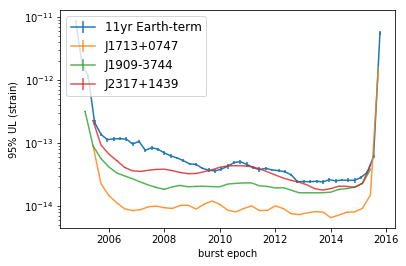

In [8]:
plot_psrs = [#'J0030+0451',
             #'J0340+4130',
             'J1713+0747',
             'J1909-3744',
             'J2317+1439',
             ]

colors = ['C1', 'C2', 'C3',]# 'C4']


plt.close()
ii = 0
#plt.errorbar(Ts_11yr, UL_11yr[ii], dUL_11yr[ii], color='C0', label='11yr Earth-term')
plt.errorbar(Ts_resamp, UL_resamp[ii], dUL_resamp[ii], color='C0', label='11yr Earth-term')
#plt.errorbar(Ts_9yr, UL_9yr[ii], dUL_9yr[ii], color='C1', label='9yr')

# some individual PSRs
for psr,col in zip(plot_psrs, colors):
    plt.errorbar(*UL_dict[psr], color=col, alpha=0.8, label=psr)

plt.legend(loc='upper left', fontsize=12)
plt.yscale('log')
plt.xlabel(r'burst epoch')
plt.ylabel(r'$95\%$ UL (strain)')

plt.savefig('/home/pbaker/ULvt_sngl.pdf')
plt.show()

In [10]:
psr_compare = [all_psrs[3*ii:3*ii+3] for ii in range(len(all_psrs)//3)]
psr_compare[-1].append(all_psrs[-1])

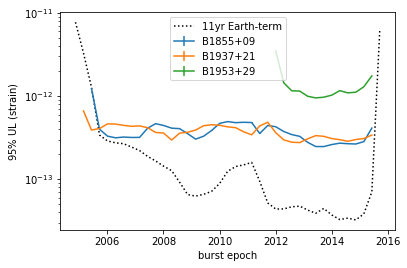

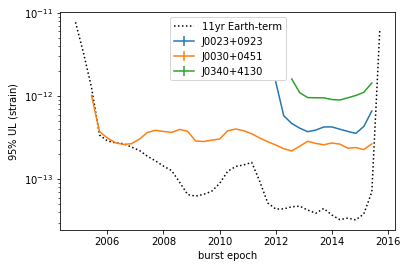

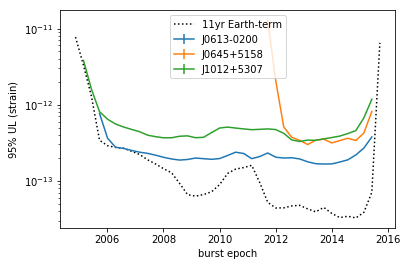

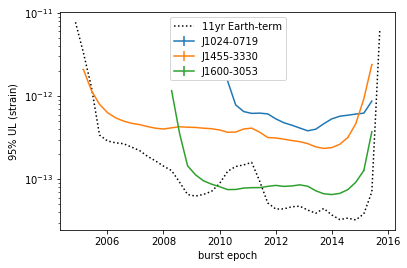

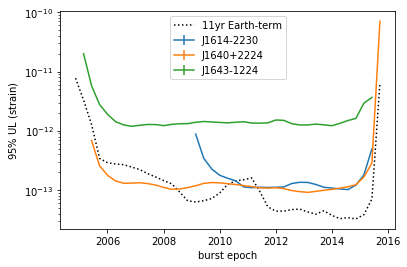

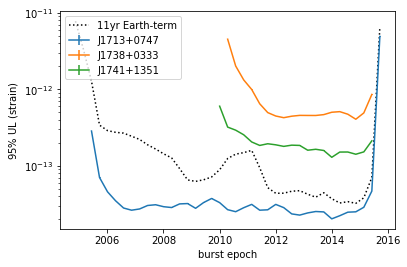

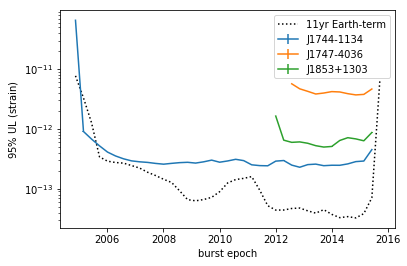

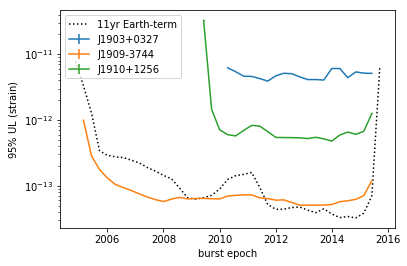

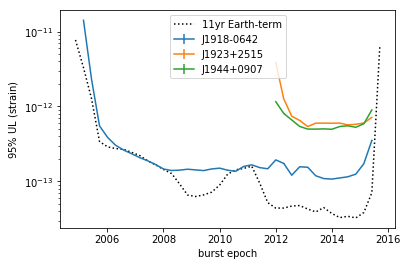

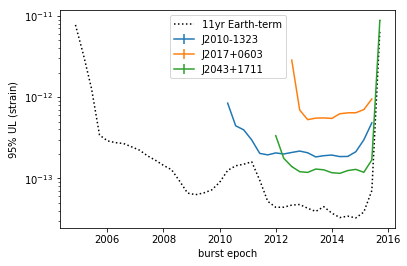

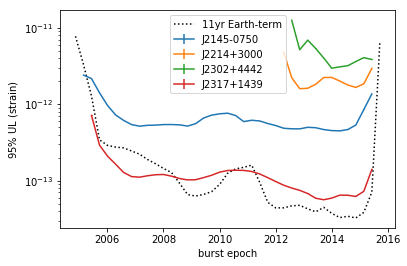

In [14]:
rescale=np.pi

for these_psrs in psr_compare:
    plt.figure()
    plt.plot(Ts_11yr, UL_11yr[0], color='k', ls=':', label='11yr Earth-term')
    for psr in these_psrs:
        Ts, UL, dUL = UL_dict[psr]
        plt.errorbar(Ts, UL*rescale, dUL, label=psr)
    plt.legend()
    plt.yscale('log')
    plt.xlabel(r'burst epoch')
    plt.ylabel(r'$95\%$ UL (strain)')
    plt.show()

Text(0, 0.5, '$95\\%$ UL (strain)')

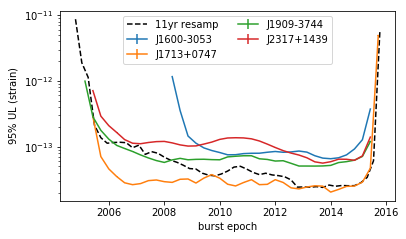

In [42]:
T_anom = Time(55421, format='mjd').decimalyear

best_psrs = [
    #'J0030+0451',    
    'J1600-3053', 
    #'J1614-2230',
    #'J1640+2224',
    'J1713+0747',
    'J1909-3744',
    #'J1918-0642',
    'J2317+1439',
]

rescale = np.pi

plt.figure(figsize=(6,3.5))
#plt.plot(Ts_11yr, UL_11yr[0], color='k', ls='--', label='11yr Earth-term')
plt.plot(Ts_resamp, UL_resamp[0], color='k', ls='--', label='11yr resamp')
#plt.axvline(x=T_anom, color='gray', ls=':', label='anomaly')
for psr in best_psrs:
    Ts, UL, dUL = UL_dict[psr]
    plt.errorbar(Ts, UL*rescale, dUL, label=psr)
plt.legend(ncol=2)
plt.yscale('log')
plt.xlabel(r'burst epoch')
plt.ylabel(r'$95\%$ UL (strain)')

Text(0, 0.5, '$95\\%$ UL (strain)')

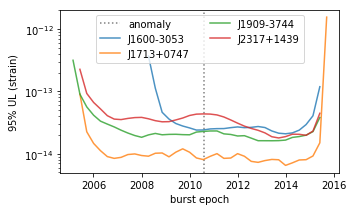

In [45]:
plt.figure(figsize=(5,3))

plt.axvline(x=T_anom, color='gray', ls=':', label='anomaly')
for psr in best_psrs:
    Ts, UL, dUL = UL_dict[psr]
    plt.plot(Ts, UL, label=psr, alpha=0.8)
plt.legend(ncol=2)
plt.yscale('log')
plt.xlabel(r'burst epoch')
plt.ylabel(r'$95\%$ UL (strain)')

In [4]:
Ts, UL, dUL = UL_dict['J1713+0747']
mask = np.logical_and(Ts<2015, Ts>2007)
np.mean(UL[mask]* np.pi), np.std(UL[mask]* np.pi) 


(2.794645399156873e-14, 3.8587094782667125e-15)

In [17]:
try_psrs = [
    'J1909-3744',
    'J2317+1439',
]

In [18]:
minlogA = -18
maxlogA = -9
prior = 1/(maxlogA-minlogA)

In [5]:
with open('/home/pbaker/nanograv/bwm/ULvT/ULs.json', 'r') as fin:
    ULmarg = json.load(fin)

# DE436 binned rerun
key = 'DE436_BE'
UL_binned = np.array(ULmarg[key]).T

In [6]:
dT_11 = np.mean(np.diff(Ts_11yr))
hsort_11 = np.sort(UL_11yr[0])
Ns_11 = np.arange(len(hsort_11))+1

dT_9 = np.mean(np.diff(Ts_9yr))
hsort_9 = np.sort(UL_9yr[0])
Ns_9 = np.arange(len(hsort_9))+1

dT_bin = np.mean(np.diff(UL_binned[0]))/365.25
hsort_bin = np.sort(UL_binned[1])
Ns_bin = np.arange(len(hsort_bin))+1

In [7]:
#sngl_ULs = UL_11yr[0]  # earth term + psr term
rescale = np.pi

sngl_ULs = []  # psr term only
for _,uls,_ in UL_dict.values():
    sngl_ULs = np.hstack([sngl_ULs, uls])

hsort_psr = np.sort(sngl_ULs) * rescale
Ns_psr = np.arange(len(hsort_psr)) + 1

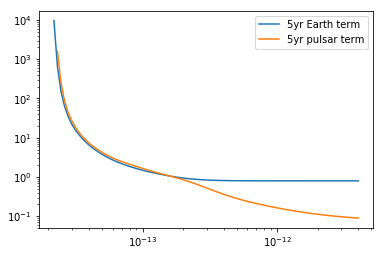

In [8]:
#NG5 ULs
ng5_e = np.loadtxt("/home/pbaker/ng5_eTerm.txt").T
ng5_p = np.loadtxt("/home/pbaker/ng5_pTerm.txt").T

plt.plot(*ng5_e, label='5yr Earth term')
plt.plot(*ng5_p, label='5yr pulsar term')
plt.legend()
plt.xscale('log')
plt.yscale('log')

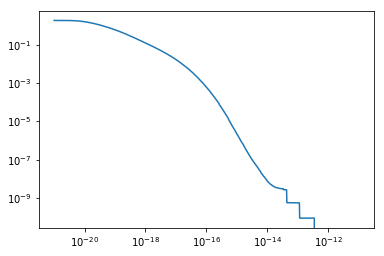

In [9]:
# Islo et al, predictions
dat = np.load("rate_vs_strain_Sesana_finegrain_10.npy").T
plt.plot(*dat)
plt.xscale('log')
plt.yscale('log')

In [19]:
def figsize(scale):
    fig_width_pt = 513.17 #469.755    # Get this from LaTeX using \the\textwidth
    inches_per_pt = 1.0 / 72.27         # Convert pt to inch
    golden_mean = (np.sqrt(5.0)-1.0)/2.0    # Aesthetic ratio
    fig_width = fig_width_pt * inches_per_pt * scale  # width in inches
    fig_height = fig_width*golden_mean            # height in inches
    fig_size = [fig_width, fig_height]
    return fig_size

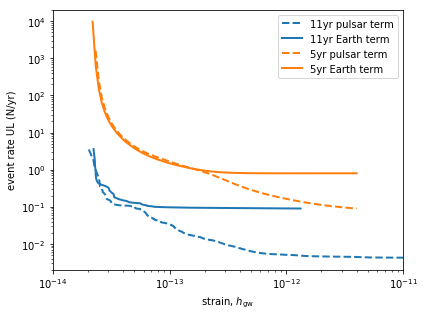

In [10]:
wid=2
#fig = plt.figure(figsize=(7,3.5))
fig = plt.figure(figsize=(6, 4.5))

plt.plot(hsort_psr, 1/(Ns_psr*dT_11), color='C0', ls='--', lw=wid, label='11yr pulsar term')
plt.plot(hsort_bin, 1/(Ns_bin*dT_bin), color='C0', lw=wid, label='11yr Earth term')

#plt.plot(hsort_9, 1/(Ns_9*dT_9), color='C1', lw=wid, label='9yr Earth term')

plt.plot(*ng5_p, color='C1', ls='--', lw=wid,label='5yr pulsar term')
plt.plot(*ng5_e, color='C1', lw=wid, label='5yr Earth term')


#plt.plot(*dat, color='C3', lw=wid, label='Islo, et al (2019)')

plt.xlabel('strain, $h_\mathrm{gw}$')#, fontsize=16)
plt.ylabel('event rate UL (N/yr)')#, fontsize=16)
plt.xscale('log')
plt.yscale('log')

plt.xlim([1e-14, 1e-11])
plt.legend()

plt.tight_layout()
plt.savefig('/home/pbaker/rateUL_11-5.pdf')

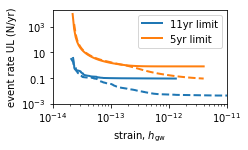

In [30]:
wid=2
fig = plt.figure(figsize=figsize(0.5))

plt.plot(hsort_psr, 1/(Ns_psr*dT_11), color='C0', ls='--', lw=wid,)
plt.plot(hsort_bin, 1/(Ns_bin*dT_bin), color='C0', lw=wid, label='11yr limit')

plt.plot(*ng5_p, color='C1', ls='--', lw=wid,)
plt.plot(*ng5_e, color='C1', lw=wid, label='5yr limit')

plt.xlabel('strain, $h_\mathrm{gw}$')
plt.ylabel('event rate UL (N/yr)')
plt.xscale('log')
plt.yscale('log')

plt.yticks(ticks=[10**3, 10**1, 10**-1, 10**-3], labels=[r'$10^3$', '$10$', '$0.1$', r'$10^{-3}$'])

plt.xlim([1e-14, 1e-11])
plt.legend(fontsize=10)

plt.tight_layout()
plt.savefig('/home/pbaker/rateUL_Astro2020.pdf')

In [59]:
ng5_p[0,0], hsort_psr[2]

(2.33328656063e-14, 2.280209262302014e-14)

In [60]:
thr = ng5_p[0,0]
ii = np.searchsorted(ng5_p[0], thr)
ng5_thr = ng5_p[1][ii]

ii = np.searchsorted(hsort_psr, thr)
ng11_thr = 1/(Ns_psr*dT_11)[ii]

In [61]:
ng5_thr / ng11_thr, thr

(1829.5990906220852, 2.33328656063e-14)

In [12]:
TMIN = 53217.0
TMAX = 57387.0
tchunk = np.linspace(TMIN, TMAX, 41)  # break in 2.5% chunks
tlim = []
for ii in range(len(tchunk)-2):
    tlim.append(tchunk[ii:ii+3])

In [13]:
ii = np.argmin(UL_11yr[0])
print(Ts_11yr[ii], UL_11yr[0][ii])

2014.854794520548 3.249398195717269e-14


In [14]:
Time(tlim[4], format='mjd').decimalyear

array([2005.72054795, 2006.00616438, 2006.29178082])

Text(0, 0.5, '$95\\%$ UL (strain)')

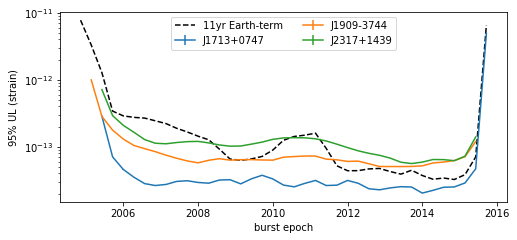

In [13]:
best_psrs = [
    'J1713+0747',
    'J1909-3744',
    'J2317+1439',
]

rescale = np.pi

plt.figure(figsize=(8,3.5))
plt.plot(Ts_11yr, UL_11yr[0], color='k', ls='--', label='11yr Earth-term')
#plt.axvline(x=T_anom, color='gray', ls=':', label='anomaly')
for psr in best_psrs:
    Ts, UL, dUL = UL_dict[psr]
    plt.errorbar(Ts, UL*rescale, dUL, label=psr)
plt.legend(ncol=2)
plt.yscale('log')
plt.xlabel(r'burst epoch')
plt.ylabel(r'$95\%$ UL (strain)')

# FINAL FIGURES

In [16]:
key = 'DE430'
ULs_430 = [x[1] for x in ULmarg[key]]
low_430 = [x[1]-x[2] for x in ULmarg[key]]
high_430 = [x[1]+x[2] for x in ULmarg[key]]

key = 'DE436'
ULs_436 = [x[1] for x in ULmarg[key]]
low_436 = [x[1]-x[2] for x in ULmarg[key]]
high_436 = [x[1]+x[2] for x in ULmarg[key]]

key = 'DE436_BE'
ULs_BE = [x[1] for x in ULmarg[key]]
low_BE = [x[1]-x[2] for x in ULmarg[key]]
high_BE = [x[1]+x[2] for x in ULmarg[key]]

T11 = [x[0] for x in ULmarg[key]]
T11 = Time(T11, format='mjd').decimalyear

NameError: name 'T9' is not defined

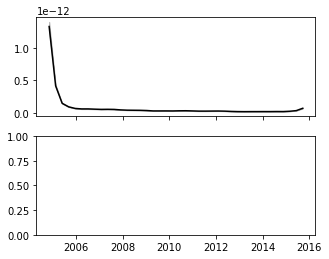

In [17]:
al = 0.25

plt.close('all')

fig = plt.figure(figsize=(5,4))
ax1, ax2 = fig.subplots(2, 1, sharex=True)

ax1.fill_between(T11, low_BE, high_BE, color='k', alpha=al)
ax1.plot(T11, ULs_BE, color='k', label='11yr')

ax1.fill_between(T9, low_9, high_9, color='C2', alpha=al)
ax1.plot(T9, ULs_9, color='C2', label=' 9yr')

ax1.legend(loc='upper center', fontsize=10)
ax1.set_yscale('log')
ax1.set_ylabel(r'$95\%$ UL (strain)', fontsize=10)

ax2.fill_between(T11, low_436, high_436, color='C0', alpha=al)
ax2.plot(T11, ULs_436, color='C0', label='DE436')

ax2.fill_between(T11, low_430, high_430, color='C1', alpha=al)
ax2.plot(T11, ULs_430, color='C1', label='DE430')

ax2.fill_between(T11, low_BE, high_BE, color='k', alpha=al)
ax2.plot(T11, ULs_BE, color='k', label='BayesEphem')

ax2.legend(loc='upper center', fontsize=10)
ax2.set_yscale('log')
ax2.set_xlabel(r'burst epoch', fontsize=10)
ax2.set_ylabel(r'$95\%$ UL (strain)', fontsize=10)
plt.tight_layout()

plt.savefig("/home/pbaker/UL_v_t.pdf")

In [38]:
J1713_opt.T

array([[5.35297500e+04, 9.07885310e-14, 8.70183012e-16],
       [5.36340000e+04, 2.24745611e-14, 1.43421449e-16],
       [5.37382500e+04, 1.46136203e-14, 1.00558776e-16],
       [5.38425000e+04, 1.11726633e-14, 8.62856985e-17],
       [5.39467500e+04, 8.98151771e-15, 7.52781206e-17],
       [5.40510000e+04, 8.41095245e-15, 6.54273521e-17],
       [5.41552500e+04, 8.72974465e-15, 7.41829092e-17],
       [5.42595000e+04, 9.68927024e-15, 9.74501641e-17],
       [5.43637500e+04, 9.90963357e-15, 9.72943242e-17],
       [5.44680000e+04, 9.34374744e-15, 9.05736618e-17],
       [5.45722500e+04, 9.11242280e-15, 7.52539347e-17],
       [5.46765000e+04, 1.01621078e-14, 1.13768443e-16],
       [5.47807500e+04, 1.02673591e-14, 9.77068754e-17],
       [5.48850000e+04, 8.90613179e-15, 7.17170611e-17],
       [5.49892500e+04, 1.05857118e-14, 7.92064676e-17],
       [5.50935000e+04, 1.19628021e-14, 1.03380094e-16],
       [5.51977500e+04, 1.05567167e-14, 7.60403109e-17],
       [5.53020000e+04, 8.54181

In [46]:
sngl_runs = '/home/pbaker/nanograv/bwm/sngl/uplim_DE436'
pname = 'J1713+0747'

ULfile = os.path.join(sngl_runs, pname, "ULvT_{:s}.dat".format(pname))
J1713_opt = np.loadtxt(ULfile)

J1713_Ts = Time(J1713_opt[0], format='mjd').decimalyear

J1713_ULs = [x[1] for x in J1713_opt.T]
J1713_low = [x[1]-x[2] for x in J1713_opt.T]
J1713_high = [x[1]+x[2] for x in J1713_opt.T]


# earth-term best source orientation for each time bin (from ULvt_post.ipynb)
best = np.array(
    [1.44490506e-13, 6.22070408e-14, 2.19012534e-14, 1.51206219e-14,
     1.28900134e-14, 6.88746799e-15, 7.46864473e-15, 7.78535327e-15,
     4.71788123e-15, 5.57351006e-15, 5.75463446e-15, 6.61798374e-15,
     5.38088219e-15, 5.22685056e-15, 5.15507171e-15, 5.10055013e-15,
     5.84093593e-15, 4.13696718e-15, 5.07611726e-15, 4.18810852e-15,
     4.16668178e-15, 4.22520830e-15, 3.68823550e-15, 3.79931560e-15,
     4.01828926e-15, 4.47221972e-15, 2.99191590e-15, 4.93018684e-15,
     3.48198989e-15, 4.19956015e-15, 2.53736492e-15, 4.12775499e-15,
     3.85474276e-15, 3.03049650e-15, 4.43941884e-15, 4.21373834e-15,
     5.21945653e-15, 5.32721146e-15, 8.77647508e-15, 1.31618897e-14]
)

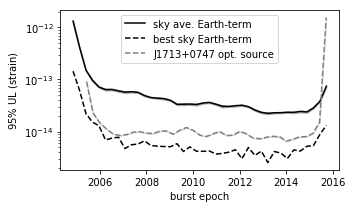

In [49]:
plt.close()
fig = plt.figure(figsize=(5,3))

plt.fill_between(T11, low_BE, high_BE, color='k', alpha=al)
plt.plot(T11, ULs_BE, color='k', label='sky ave. Earth-term')

plt.plot(T11, best, ls='--', color='k', label="best sky Earth-term")

#plt.plot(*J1713_UL, color='k', label=pname+" sky-ave")
plt.fill_between(J1713_Ts, J1713_low, J1713_high, color='gray', alpha=al)
plt.plot(J1713_Ts, J1713_ULs, ls='--', color='gray', label=pname+" opt. source")


plt.legend(loc='upper center')
plt.yscale('log')
plt.xlabel(r'burst epoch')
plt.ylabel(r'$95\%$ UL (strain)');

plt.tight_layout()
plt.savefig("/home/pbaker/UL_v_t_compare.pdf")

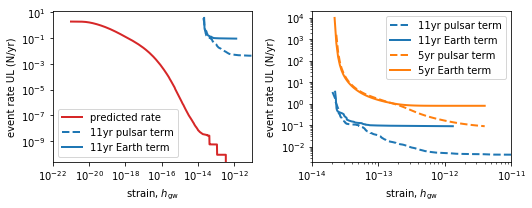

In [48]:
wid=2
fig = plt.figure(figsize=(7.5,3))
ax1, ax2 = fig.subplots(1, 2)

# compare with 
ax1.plot(*dat, color='C3', lw=wid, label='predicted rate')
ax1.plot(hsort_psr, 1/(Ns_psr*dT_11), color='C0', ls='--', lw=wid, label='11yr pulsar term')
ax1.plot(hsort_bin, 1/(Ns_bin*dT_bin), color='C0', lw=wid, label='11yr Earth term')


# zoom
ax2.plot(hsort_psr, 1/(Ns_psr*dT_11), color='C0', ls='--', lw=wid, label='11yr pulsar term')
ax2.plot(hsort_bin, 1/(Ns_bin*dT_bin), color='C0', lw=wid, label='11yr Earth term')

ax2.plot(*ng5_p, color='C1', ls='--', lw=wid,label='5yr pulsar term')
ax2.plot(*ng5_e, color='C1', lw=wid, label='5yr Earth term')

for ax in fig.axes:
    ax.set_xlabel('strain, $h_\mathrm{gw}$')#, fontsize=16)
    ax.set_ylabel('event rate UL (N/yr)')#, fontsize=16)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.legend()

ax1.set_xlim([1e-22, 1e-11])
ax2.set_xlim([1e-14, 1e-11])
    
plt.tight_layout()
plt.savefig('/home/pbaker/rateUL_compare.pdf')